In [1]:
import xgboost
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import pycaret

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("diamonds.csv", index_col = 0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
from pycaret.regression import *
setter = setup(data=df, target="price", train_size=0.7, categorical_features = ['cut', 'color', 'clarity'], remove_outliers = True)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,7857
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(53940, 10)"
4,Missing Values,False
5,Numeric Features,6
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [4]:
get_config("X_train")

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
50050,0.78,62.8,56.0,5.90,5.86,3.69,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
46594,0.54,60.3,55.0,5.32,5.26,3.19,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
329,0.72,62.4,58.0,5.83,5.70,3.60,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8611,1.02,63.1,57.0,6.37,6.43,4.04,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
29568,0.41,63.2,58.0,4.68,4.72,2.97,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20707,0.31,61.4,59.0,4.35,4.38,2.68,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
22327,1.16,59.9,57.0,6.85,6.93,4.13,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14762,1.00,61.6,58.0,6.39,6.43,3.95,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1404,0.25,61.5,56.0,4.04,4.06,2.48,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
xgb_model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,291.0254,291263.4320,539.6883,0.9793,0.0969,0.0744
1,294.9711,372787.6849,610.5634,0.9742,0.1031,0.0770
2,320.0493,399392.2875,631.9749,0.9751,0.1074,0.0795
3,274.3301,268663.4451,518.3275,0.9824,0.1013,0.0747
4,285.1709,296185.1942,544.2290,0.9806,0.1004,0.0749
5,276.2294,314449.3585,560.7578,0.9797,0.1051,0.0773
6,286.1544,282760.6468,531.7524,0.9800,0.0988,0.0777
7,293.0355,346044.3410,588.2553,0.9781,0.1025,0.0774
8,293.6331,343563.8407,586.1432,0.9790,0.0948,0.0706
9,291.1894,318390.0375,564.2606,0.9795,0.0996,0.0760


In [7]:
predict_model(xgb_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,290.3012,313735.2277,560.1207,0.9793,0.0987,0.0744


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price,Label
0,1.10,62.0,56.0,6.59,6.63,4.10,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7267.0,7030.800781
1,1.00,59.6,60.0,6.57,6.52,3.90,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6868.0,6747.131836
2,0.50,61.6,58.0,5.08,5.11,3.14,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1235.0,1207.904175
3,0.30,60.8,61.0,4.30,4.25,2.60,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,540.0,515.487976
4,0.74,62.1,64.0,5.76,5.71,3.56,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2366.0,2287.970947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,0.30,63.3,60.0,4.25,4.22,2.68,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,878.0,760.659607
4608,0.41,62.1,57.0,4.79,4.75,2.96,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1356.0,1317.115601
4609,0.70,62.3,56.0,5.66,5.71,3.54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2362.0,2764.371826
4610,0.47,61.8,54.0,5.01,5.05,3.11,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,782.0,728.286377


In [10]:
get_config("X_test")

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
17972,1.10,62.0,56.0,6.59,6.63,4.10,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17195,1.00,59.6,60.0,6.57,6.52,3.90,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41509,0.50,61.6,58.0,5.08,5.11,3.14,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49953,0.30,60.8,61.0,4.30,4.25,2.60,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
51373,0.74,62.1,64.0,5.76,5.71,3.56,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34832,0.30,63.3,60.0,4.25,4.22,2.68,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42842,0.41,62.1,57.0,4.79,4.75,2.96,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51331,0.70,62.3,56.0,5.66,5.71,3.54,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32111,0.47,61.8,54.0,5.01,5.05,3.11,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


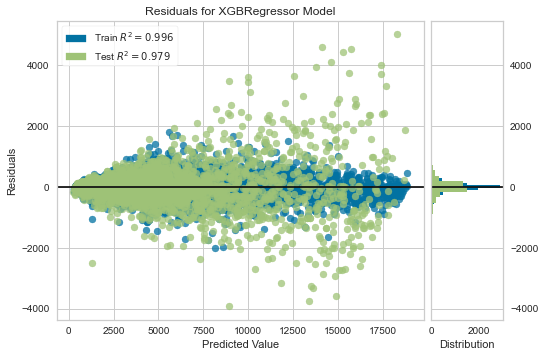

In [21]:
plot_model(xgb_model, plot='residuals')

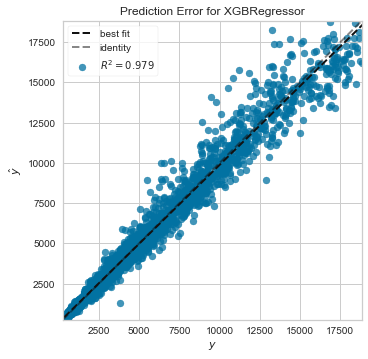

In [13]:
plot_model(xgb_model, plot="error")

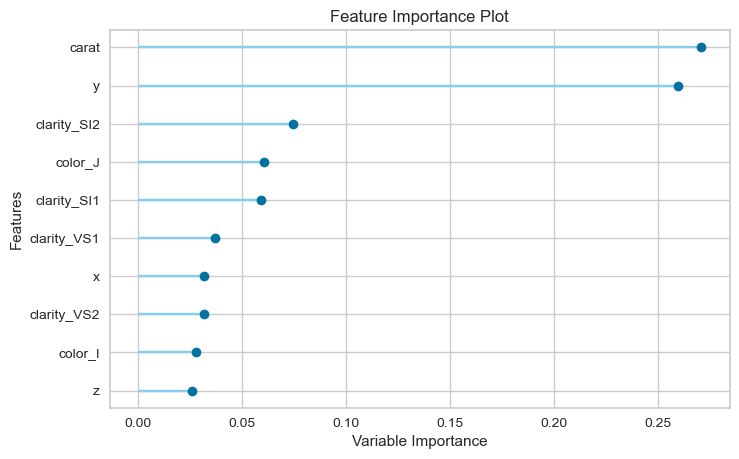

In [14]:
plot_model(xgb_model, plot="feature")

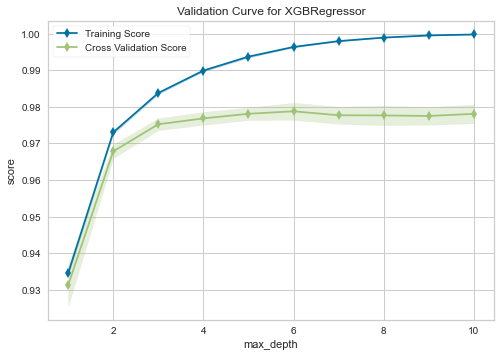

In [23]:
plot_model(xgb_model, plot='vc')

In [24]:
plot_model(xgb_model, plot='parameter')

,Parameters
objective,reg:squarederror
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,1
gamma,0
gpu_id,-1
importance_type,gain
interaction_constraints,
